<a href="https://colab.research.google.com/github/gregorywmorris/MLZoom2022/blob/main/MLZoomcampWeek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 Homework

In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

In [36]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
!wget $data

--2022-09-19 23:31:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.02s   

2022-09-19 23:31:21 (69.8 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [37]:
df = pd.read_csv('housing.csv')

In [38]:
base = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

df = df[base]

df.dtypes

latitude              float64
longitude             float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

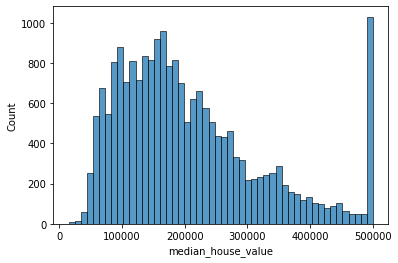

In [56]:
sns.histplot(df.median_house_value, bins = 50)

#Q1
Find a feature with missing values. How many missing values does it have?

a. 207
b. 307
c. 408
d. 508

In [57]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Q2
What's the median (50% percentile) for variable 'population'?

a. 1133
b. 1122
c. 1166
d. 1188

In [58]:
df['population'].median()

1166.0

#Split the data
Shuffle the initial dataset, use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Make sure that the target value ('median_house_value') is not in your dataframe.
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [60]:
n = len(df)

In [61]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx) 

In [62]:
# Creating a 
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test 

n, n_val + n_test + n_train #Sanity Check

(20640, 20640)

In [63]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]] 
df_test = df.iloc[idx[n_train + n_val:]]

split_total = len(df_train) + len(df_val) + len(df_test) 
split = len(df_train), len(df_val), len(df_test)

split_total, split

(20640, (12384, 4128, 4128))

In [64]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [65]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [66]:
# origional data remains intact
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

#Q3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

Options:

a. With 0
b. With mean
c. Both are equally good

## Mean

In [136]:
X_mean = df_train.copy()
X_mean = X_mean.fillna(df_train.mean())

In [137]:
X_train_mean = df_train.fillna(df_train.mean())

In [138]:
def train_linear_regression(X, y): # Implement the training program
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])
  
  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [139]:
w0, tlr_mean = train_linear_regression(X_mean, y_train)
w0, tlr_mean

(3.8668309378082237,
 array([-9.55734707e-02, -8.99357321e-02, -1.82969843e-03,  3.36165000e-06,
        -3.30145779e-06, -1.15577346e-05,  4.72132381e-05,  5.54497041e-03,
         4.28874645e-06]))

In [140]:
y_pred_mean = w0 + df_train.dot(tlr_mean)
y_pred_mean

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
12379    13.228364
12380    12.215041
12381    11.681577
12382    11.808099
12383    13.057054
Length: 12384, dtype: float64

In [128]:
def rmse(y, y_pred):
  error = y - y_pred
  se = error ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [129]:
rmse_mean = round(rmse(df_val, y_pred_mean), 2)
rmse_mean

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
                      ..
median_house_value   NaN
median_income        NaN
population           NaN
total_bedrooms       NaN
total_rooms          NaN
Length: 12393, dtype: float64

## Zeroes

In [141]:
X0 = df_val.copy()
X0 = X0.fillna(0)

In [142]:
w0, tlr_0 = train_linear_regression(X0, y_val)
w0, tlr_0

(2.703495402089332,
 array([-1.06202350e-01, -1.02680109e-01, -1.33845086e-03,  3.66794245e-06,
         2.21962511e-05, -3.17629212e-06,  6.56044017e-06,  5.96024232e-03,
         4.26113487e-06]))

In [143]:
y_pred_0 = w0 + df_val.dot(tlr_mean)
y_pred_mean

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
12379    13.228364
12380    12.215041
12381    11.681577
12382    11.808099
12383    13.057054
Length: 12384, dtype: float64

In [94]:
rmse_0 = round(rmse(df_val, y_pred_0), 2)
rmse_0

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
                      ..
median_house_value   NaN
median_income        NaN
population           NaN
total_bedrooms       NaN
total_rooms          NaN
Length: 4137, dtype: float64

Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:

0
0.000001
0.001
0.0001

Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

0.16
0.00005
0.005
0.15555

Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

0.35
0.135
0.450
0.245

Submit the results
Submit your results here: https://forms.gle/WCVb4KMNsgbkuJtr6
If your answer doesn't match options exactly, select the closest one.
You can submit your solution multiple times. In this case, only the last submission will be used
Deadline
The deadline for submitting is, 19 September 2022, 23:00 CET. After that, the form will be closed.